In [75]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [76]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [77]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [78]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)


In [79]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(
    scaled_data,
    columns=market_data_df.columns
)


# Copy the crypto names from the original data
scaled_df.index = market_data_df.index


# Set the coinid column as index
scaled_df.index.name = "coin_id"

# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [80]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
kvalues = list(range(1, 11))


# Create an empty list to store the inertia values
inertiaValues = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in kvalues:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertiaValues.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbowData = {"k": kvalues, "inertia": inertiaValues}

# Create a DataFrame with the data to plot the Elbow curve
elbowDf = pd.DataFrame(elbowData)

# Display the DataFrame
display(elbowDf.head())

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


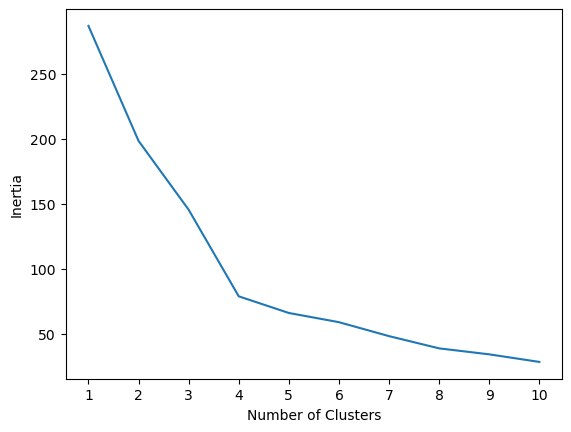

In [81]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbowDf["k"], elbowDf["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [82]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)


In [83]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)


c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [84]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictedClusters = kmeans.predict(scaled_df)

# View the resulting array of cluster values.
display(predictedClusters)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [85]:
# Create a copy of the DataFrame
copy_scaled_df = scaled_df.copy()


In [86]:
# Add a new column to the DataFrame with the predicted clusters
copy_scaled_df["predicted_clusters"] = predictedClusters

# Display sample data
display(copy_scaled_df.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

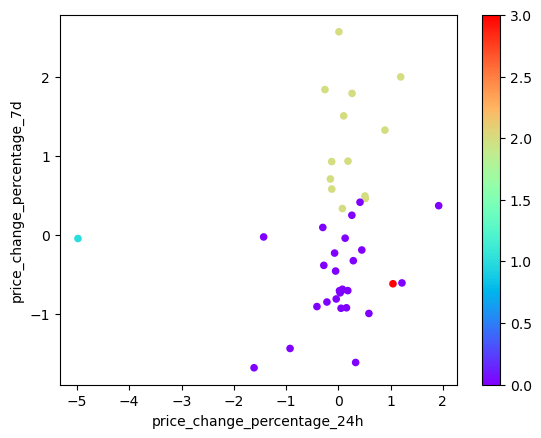

In [87]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
copy_scaled_df.plot(
    kind="scatter",
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c=copy_scaled_df["predicted_clusters"],
    colormap="rainbow"
)



### Optimize Clusters with Principal Component Analysis.

In [94]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)


In [95]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
new_market_data_df = pca_model.fit_transform(scaled_data)

# View the first five rows of the DataFrame. 
display(new_market_data_df[:5])


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [96]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
display(explained_variance)


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 9.998139161e-01

In [98]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(
    new_market_data_df,
    columns=['PCA1', 'PCA2', 'PCA3']
)

# Display first few rows
display(pca_df.head())


# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index


# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)


# Display sample data
display(pca_df.head())


,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [99]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
kvalues2 = list(range(1,11))

# Create an empty list to store the inertia values
inertiaValues2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in kvalues2:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pca_df)
    inertiaValues2.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbowData2 = { "k": kvalues2, "inertia": inertiaValues2 }

# Create a DataFrame with the data to plot the Elbow curve
elbow_DF2 = pd.DataFrame(elbowData2)

# Display the DataFrame
display(elbow_DF2)

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


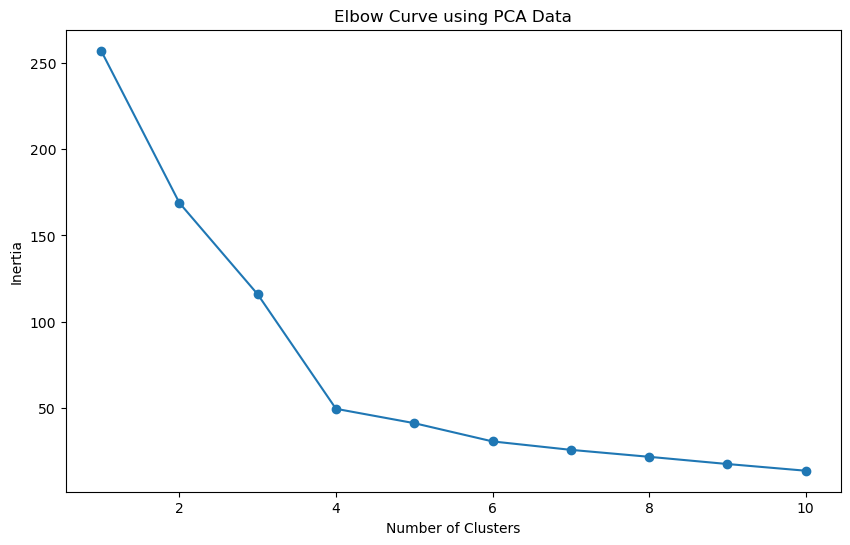

In [100]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10,6))
plt.plot(elbow_DF2["k"], elbow_DF2["inertia"], marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve using PCA Data")
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [101]:
# Initialize the K-Means model using the best value for k
kMeansModel = KMeans(n_clusters=4, random_state=0)


In [102]:
# Fit the K-Means model using the PCA data
kMeansModel.fit(pca_df)

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [103]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = kMeansModel.predict(pca_df)

# Print the resulting array of cluster values.
display(crypto_clusters)

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [104]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_df["crypto_clusters"] = crypto_clusters

# Display sample data
display(clustered_df.head())


,PCA1,PCA2,PCA3,crypto_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

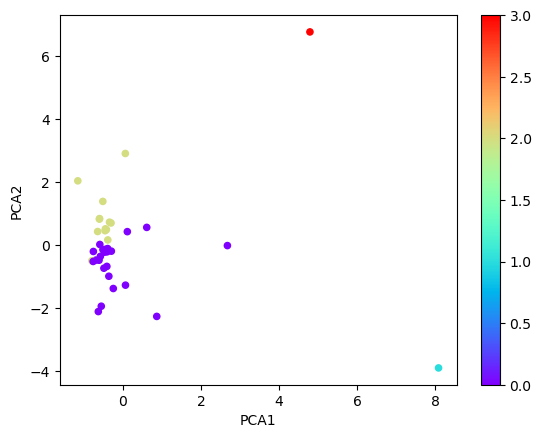

In [105]:
# Create a scatter plot by setting `x="PCA1"` and `y="PCA2"`. 
clustered_df.plot(
    kind="scatter",
    x="PCA1",
    y="PCA2",
    c=clustered_df["crypto_clusters"],
    colormap="rainbow"
)

### Determine the Weights of Each Feature on each Principal Component

In [108]:
# Use the columns from the original scaled DataFrame as the index.
# Create a DataFrame with the PCA components and their weights
weights_df = pd.DataFrame(
    pca.components_,
    columns=scaled_df.columns,
    index=['PCA1', 'PCA2', 'PCA3']
)

# Display the weights
display(weights_df)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PCA1,-0.001521,-0.000197,-0.000705,0.000955,0.008795,0.300266,0.953813
PCA2,0.003933,-0.001289,0.006577,0.087961,0.158367,0.937599,-0.296700
PCA3,0.013938,-0.016462,0.126844,0.377659,0.899181,-0.173684,0.046120


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    